# Test Throughput

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
from matplotlib.patches import Rectangle

%matplotlib inline
import pickle
import h5py
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [3]:
sys.path.append('./lib')
from libThoughputFit import *

libThroughputFit.py :: Use atmosphtransmemullsst.__path__[0],'../data/simplegrid as the path to data
libThroughputFit.py :: data_path = /Volumes/Backup2020/MacOSX/GitHub/LSST/atmosphtransmemullsst/atmosphtransmemullsst/../data/simplegrid
SimpleAtmEmulator:path=/Volumes/Backup2020/MacOSX/GitHub/LSST/atmosphtransmemullsst/atmosphtransmemullsst/../data/simplegrid


In [4]:
path = "../../BouguerLines/202307/dataout/MLfitsmoothGPsmoothGP-absbadremoved-2023-January-17-18-mucol.csv"

In [5]:
th = ThrouputCut(path,absband_list = ["O3","O2_2","H2O_2","H2O_3"])

O3
O2_2
H2O_2
H2O_3
[200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 410 411 412 413 414 415 416
 417 418 419 420 465 466 467 468 469 470 471 472 473 474 475 476 477 478
 479 480 481 482 483 484 485 575 576 577 578 579 580 581 582 583 584 585
 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603
 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621
 622 623 624 625 626 627 628 629 630]


In [6]:
th

/var/folders/cq/vms8st5136z3q5xx4rd9xqfr0000gw/T/ipykernel_7648/4269402478.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(th.wl,th.th,'.',marker=".", markersize=5)


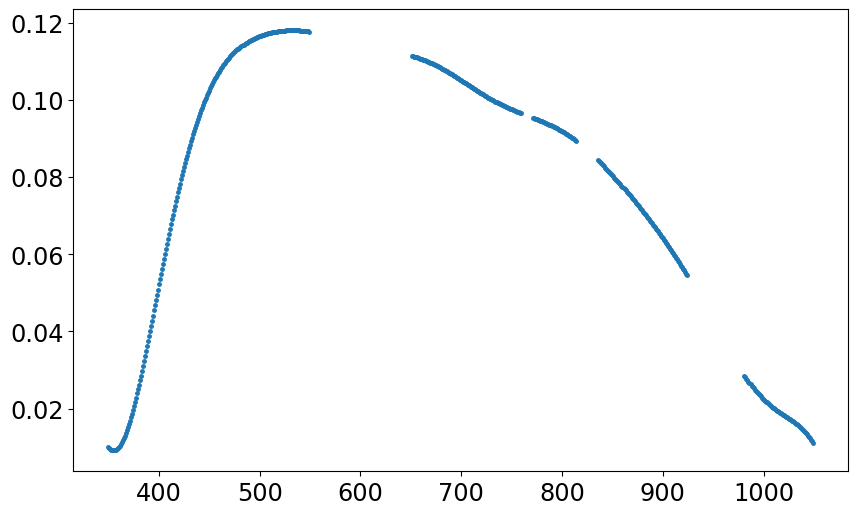

In [11]:
plt.plot(th.wl,th.th,'.',marker=".", markersize=5)